
# Purpose:
To help an online tech-varsity in learner segmentation which may help them in planning appropriate strategies

# Approach:
1. Initially very basic steps were applied and a basic kmeans clustering model was created. It was observed that there were unusual (not plausible) values in "Years of experience". after looking into the data deeply, the reason for this was found in the "orgyear" column where some future years were appearing and also very old years were appearing. these unusual records were dropped from the data set and further data preprocessing was done.
2. manual clustering steps were performed.
3. most of teh questions (as per the business case guidelines) are answered.
4. subsequently Kmeans clustering was done. Elbow method was used for identifying appropriate value for K.
5. Hierarchical clustering was done on a downsized data (that was done on colab as memory resources on my laptop were not sufficient. Link of teh colab notebook will be shared.
6. Data looks awkward (as seen in the excel line chart of experience vs salary.
7. PCA, tsne were not done as laptop resources were not sufficient and even colab was giving error message saying that allocated memory is consumed and crashed multiple times...
8. Not many insights are drawn out from teh analysis. very basic insights were observed and recorder in teh relevant cells.

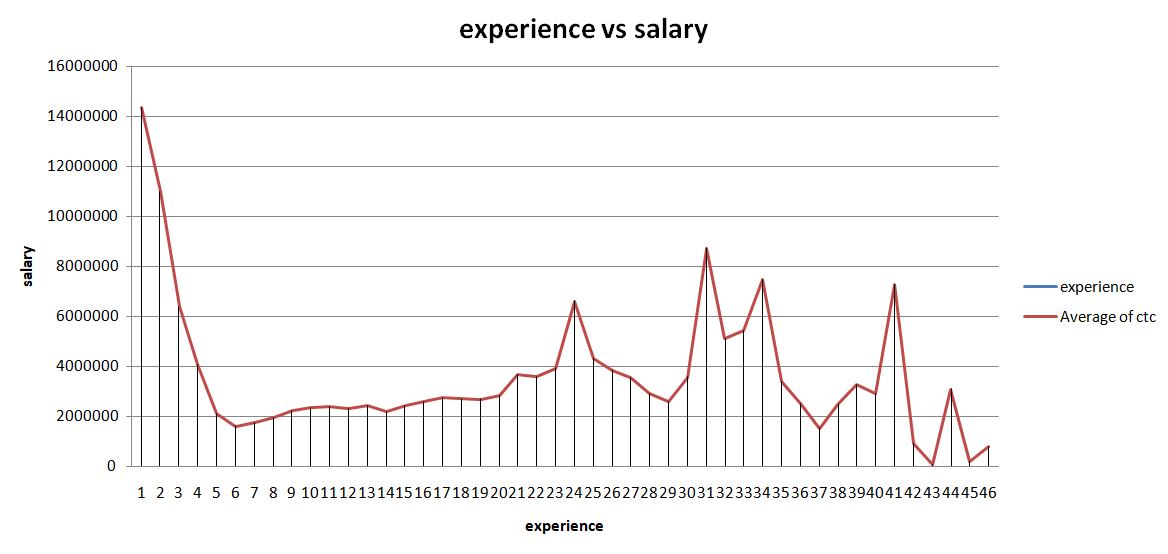

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# file_path = '/content/drive/My Drive/scaler_clustering.csv'

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from scipy.cluster.hierarchy import dendrogram, linkage


In [4]:
# Load the dataset
df = pd.read_csv('scaler_clustering.csv')

In [5]:
# Check the first few rows of the dataset
print(df.head())

   index               company_hash  \
0      0             atrgxnnt xzaxv   
1      1  qtrxvzwt xzegwgbb rxbxnta   
2      2              ojzwnvwnxw vx   
3      3                  ngpgutaxv   
4      4                 qxen sqghu   

                                          email_hash  orgyear      ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...   2015.0  2000000   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58...   2017.0   700000   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...   2017.0  1400000   

         job_position  ctc_updated_year  
0               Other              2020  
1  FullStack Engineer              2019  
2    Backend Engineer              2020  
3    Backend Engineer              2019  
4  FullStack Engineer              2019  


In [6]:
# Checking the shape, data types, and missing values
print(df.shape)

(205843, 7)


In [7]:
# Check for duplicates
duplicates = df.duplicated()


In [8]:
# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 11.0+ MB
None


I see that orgyear (which is "employment start year", ) has afew values which are future years and a few values which lead to more than 50 years of experience, which is not plausible. I would like to remove these rows from the dataset.

In [10]:
# Set the current year
current_year = 2024


In [11]:
# Detect and eliminate rows where 'orgyear' is in the future or leads to more than 50 years of experience
# Define a valid range for 'orgyear': should be less than or equal to the current year, and not more than 50 years old
valid_orgyear = (df['orgyear'] <= current_year) & (df['orgyear'] >= current_year - 50)



In [12]:
# Filter the dataset to keep only the valid records
df_cleaned = df[valid_orgyear]



In [13]:
# Check the shape of the cleaned dataframe and number of rows removed
print(f"Original dataset size: {df.shape}")
print(f"Cleaned dataset size: {df_cleaned.shape}")
print(f"Number of invalid records removed: {df.shape[0] - df_cleaned.shape[0]}")

Original dataset size: (205843, 7)
Cleaned dataset size: (205665, 7)
Number of invalid records removed: 178


In [14]:
# Get the invalid rows that were removed
invalid_rows = df[~valid_orgyear]



In [15]:
# Display the invalid rows
print(invalid_rows)

         index                  company_hash  \
2211      2211                        phrxkv   
2333      2333    xgmgn ntwyzgrgsxto ucn rna   
2562      2562                            tj   
3122      3122                      ft tdwtr   
3365      3365                   fyxntyvn lq   
...        ...                           ...   
196354  197352          vaxnjv mxqrv wvuxnvr   
198187  199212                 xb  v onhatzn   
202210  203276                     mqvmtzatq   
203992  205068  xatv ouvqp ogrhnxgzo ucn rna   
205435  206515                      vhngsqxa   

                                               email_hash  orgyear      ctc  \
2211    3394674bb6bb1de6289e931853fa0bd131c811e0054a92...   2031.0  1500000   
2333    c737ceb66c7f0ce37c2fce087003aa129632a3a2fa4f6c...      NaN   170000   
2562    25edac17c77f6f0edeafb86f7a7844d96dc899e193c87e...      NaN   860000   
3122    c402eba160abf4e5b5f72af775fc98dbd346f1a081112e...      NaN   600000   
3365    38bd913564fa983cd4fb

In [16]:
print(df_cleaned.isnull().sum())

index                   0
company_hash           44
email_hash              0
orgyear                 0
ctc                     0
job_position        52508
ctc_updated_year        0
dtype: int64


In [17]:
# Mode imputation for company_hash
df_cleaned['company_hash'].fillna(df_cleaned['company_hash'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_22336\2994647386.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['company_hash'].fillna(df_cleaned['company_hash'].mode()[0], inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_22336\2994647386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['company_hash'].fillna(d

In [18]:
print(df_cleaned.isnull().sum())

index                   0
company_hash            0
email_hash              0
orgyear                 0
ctc                     0
job_position        52508
ctc_updated_year        0
dtype: int64


In [19]:
# Fill missing values (Mean/ KNN Imputation)
# imputer = KNNImputer(n_neighbors=5)

In [20]:
# df_cleaned[['orgyear']] = imputer.fit_transform(df_cleaned[['orgyear']])

In [21]:
# print(df_cleaned.isnull().sum())

In [22]:
# Convert orgyear
df_cleaned['orgyear'] = df_cleaned['orgyear'].astype(int)

C:\Users\Dell\AppData\Local\Temp\ipykernel_22336\1583577424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['orgyear'] = df_cleaned['orgyear'].astype(int)


In [23]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 205665 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             205665 non-null  int64 
 1   company_hash      205665 non-null  object
 2   email_hash        205665 non-null  object
 3   orgyear           205665 non-null  int32 
 4   ctc               205665 non-null  int64 
 5   job_position      153157 non-null  object
 6   ctc_updated_year  205665 non-null  int64 
dtypes: int32(1), int64(3), object(3)
memory usage: 11.8+ MB
None


In [24]:
print(df_cleaned.isnull().sum())

index                   0
company_hash            0
email_hash              0
orgyear                 0
ctc                     0
job_position        52508
ctc_updated_year        0
dtype: int64


In [25]:
# Group by company_hash and fill missing job_position with mode for that company
df_cleaned['job_position'] = df_cleaned.groupby('company_hash')['job_position'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

C:\Users\Dell\AppData\Local\Temp\ipykernel_22336\2546825487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['job_position'] = df_cleaned.groupby('company_hash')['job_position'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


In [26]:
print(df_cleaned.isnull().sum())

index               0
company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64


In [27]:
#############################################################################################

In [28]:
df_cleaned.head()

,index,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019


In [29]:
# Unique email hashes and frequency of occurrences
print(df_cleaned['email_hash'].value_counts())

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551     8
                                                                    ..
6ed7767a6ba36e8ab4f4d2397a4d32f26f34387720645906bf51a05c2152fd56     1
9778d2fa1bbfb721c3e90941cb3474740610d301f2ccf1429f5c6835ae5e27f4     1
9a891d279335db60cd6a45c2243bca2c56f940e31c5a812a6f642ea800832c4b     1
e96207e084f4552ba131598c704d2c5f12373999fc66285f58dea00afb9d333c     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: count, Length: 153292, dtype: int64


In [30]:
# Remove special characters from Company_hash
df_cleaned['company_hash_cleaned'] = df_cleaned['company_hash'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x)))

C:\Users\Dell\AppData\Local\Temp\ipykernel_22336\1841518091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['company_hash_cleaned'] = df_cleaned['company_hash'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x)))


In [31]:
# Unique "company_hash_cleaned" hashes and frequency of occurrences
print(df_cleaned['company_hash_cleaned'].value_counts())

company_hash_cleaned
nvnv wgzohrnvzwj otqcxwto    8379
xzegojo                      5378
vbvkgz                       3480
zgn vuurxwvmrt vwwghzn       3408
wgszxkvzn                    3238
                             ... 
bvpt owyggr                     1
vhngsqxa xzaxv                  1
ctavznh td kteg                 1
ihxwprgsxw ogenfvqt             1
bvptbjnqxu td vbvkgz            1
Name: count, Length: 37246, dtype: int64


In [32]:
# Dropping the 'company_hash' column from the DataFrame
df_cleaned.drop(columns=['company_hash'], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_22336\3049061100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['company_hash'], inplace=True)


In [33]:
print(df_cleaned.shape)

(205665, 7)


In [34]:
# Create new feature 'Years_of_Experience'
current_year = 2024
df_cleaned['Years_of_Experience'] = current_year - df_cleaned['orgyear']

C:\Users\Dell\AppData\Local\Temp\ipykernel_22336\2370425679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Years_of_Experience'] = current_year - df_cleaned['orgyear']


In [35]:
df_cleaned.head()

,index,email_hash,orgyear,ctc,job_position,ctc_updated_year,company_hash_cleaned,Years_of_Experience
0,0,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,atrgxnnt xzaxv,8
1,1,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,qtrxvzwt xzegwgbb rxbxnta,6
2,2,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,ojzwnvwnxw vx,9
3,3,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,ngpgutaxv,7
4,4,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,qxen sqghu,7


In [37]:
# from google.colab import files

In [38]:
# # Export the cleaned DataFrame to Excel
# df_cleaned.to_excel('scaler_clustering_pre_pro_01.xlsx', index=False)

In [39]:
# # Download the file
# files.download('scaler_clustering_pre_pro_01.xlsx')

In [40]:
# Five-point summary of CTC
grouped = df_cleaned.groupby(['company_hash_cleaned', 'job_position', 'Years_of_Experience'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count'])

# Merge it back to the original dataframe
df_cleaned = df_cleaned.merge(grouped, how='left', on=['company_hash_cleaned', 'job_position', 'Years_of_Experience'])

# Create flags for designation, class, and tier
df_cleaned['Designation'] = np.where(df_cleaned['ctc'] > df_cleaned['mean'], 1, 0)
df_cleaned['Class'] = pd.qcut(df_cleaned['ctc'], 3, labels=[3, 2, 1])
df_cleaned['Tier'] = pd.qcut(df_cleaned['ctc'], 3, labels=[3, 2, 1])

In [41]:
# # Export the cleaned DataFrame to Excel
# df_cleaned.to_excel('scaler_clustering_pre_pro_02.xlsx', index=False)

In [42]:
# # Download the file
# files.download('scaler_clustering_pre_pro_02.xlsx')

In [57]:
df_cleaned.head()

,index,email_hash,orgyear,ctc,job_position,ctc_updated_year,company_hash_cleaned,Years_of_Experience,mean,median,max,min,count,Designation,Class,Tier,Cluster
0,0,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,atrgxnnt xzaxv,8,1.100000e+06,1100000.0,1100000,1100000,1,0,2,2,5
1,1,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,qtrxvzwt xzegwgbb rxbxnta,6,7.742856e+05,750000.0,1200000,449999,7,0,3,3,1
2,2,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,ojzwnvwnxw vx,9,2.000000e+06,2000000.0,2000000,2000000,1,0,1,1,5
3,3,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,ngpgutaxv,7,1.436154e+06,1210000.0,3160000,700000,13,0,2,2,1
4,4,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,qxen sqghu,7,1.400000e+06,1400000.0,1400000,1400000,1,0,2,2,1


In [58]:
# Top 10 employees (earning more than most of the employees in the company) - Tier 1
# Filter for Tier 1 employees and sort by CTC
top_10_tier1 = df_cleaned[df_cleaned['Tier'] == 1].sort_values(by='ctc', ascending=False).head(10)

In [59]:
top_10_tier1

,index,email_hash,orgyear,ctc,job_position,ctc_updated_year,company_hash_cleaned,Years_of_Experience,mean,median,max,min,count,Designation,Class,Tier,Cluster
72747,72925,29a71dd13adf6d2d497571a565bb3096cf66cb46cd1ece...,2015,1000150000,Unknown,2020,whmxw rgsxwo uqxcvnt rxbxnta,9,1.000150e+09,1.000150e+09,1000150000,1000150000,1,0,1,1,3
117518,117948,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,2018,255555555,FullStack Engineer,2016,obvqnuqxdwgb,6,6.531389e+07,2.300000e+06,255555555,1100000,4,1,1,1,3
3297,3301,06d231f167701592a69cdd7d5c825a0f5b30f0347a4078...,2021,250000000,Unknown,2020,aveegaxr xzntqzvnxgzvr hzxctqoxnj,3,2.500000e+08,2.500000e+08,250000000,250000000,1,0,1,1,3
82452,82674,4c19cfc1aa47a5b007004fadeacb88da76b6a59ff4271f...,1998,200000000,Security Leadership,2020,eqttwyvqst,26,2.000000e+08,2.000000e+08,200000000,200000000,1,0,1,1,3
13747,13776,1d8bbc3a2b8fb477f78ab3b1ca3f5a7ae0f256555e44ed...,2019,200000000,Backend Engineer,2020,vwwtznhqt,5,1.555678e+06,5.000000e+05,200000000,150000,211,1,1,1,3
45914,46025,47d993914804e1a737d4af1b877ebb7f6867e39134d6d7...,2019,200000000,Backend Engineer,2019,ntwywg egqbtqrj ntwy wgwpnvxr,5,2.000000e+08,2.000000e+08,200000000,200000000,1,0,1,1,3
9064,9078,4d899e4af4f98d23848a8e21455489231fc2cbf2ca9668...,2018,200000000,Research Engineers,2020,boo,6,2.000000e+08,2.000000e+08,200000000,200000000,1,0,1,1,3
82412,82634,f195ae4e02da9f187009f8545061a65f8a22a99c0e7aeb...,2018,200000000,Other,2020,ytfrtnn uvwpvqa tzntquqxot,6,6.771667e+07,2.500000e+06,200000000,650000,3,1,1,1,3
36674,36767,4b5f9d4a42d8656a5230e5fcd3666777bdcd58f0c604d1...,2012,200000000,Other,2019,wgszxkvzn,12,1.252886e+07,9.000000e+05,200000000,60000,35,1,1,1,3
20048,20087,ef9987c98edad9756ad357f551c5c861f46f8e493b358c...,2016,200000000,Other,2020,erxupvqn,8,3.006000e+07,1.390000e+06,200000000,370000,7,1,1,1,3


In [66]:
# Top 10 employees of data science in each company earning more than their peers - Class 1
# Filter for Data Science employees who belong to Class 1
df_data_science_class1 = df_cleaned[(df_cleaned['job_position'] == 'Data Scientist') & (df_cleaned['Class'] == 1)]

In [67]:
# Group by company and get the top 10 earners in each company
top_10_ds_class1 = df_data_science_class1.groupby('company_hash_cleaned').apply(lambda x: x.sort_values(by='ctc', ascending=False).head(10))

C:\Users\Dell\AppData\Local\Temp\ipykernel_22336\2078019100.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_ds_class1 = df_data_science_class1.groupby('company_hash_cleaned').apply(lambda x: x.sort_values(by='ctc', ascending=False).head(10))


In [68]:
top_10_ds_class1

index  \
company_hash_cleaned                       
1t xzegojontbo            119686  120124   
2020                      45577    45687   
                          196318  197495   
                          84060    84290   
                          124514  125001   
...                                  ...   
zxxn ntwyzgrgsxto         148863  149562   
                          174322  175301   
zxxn ntwyzgrgsxto rxbxnta 71103    71278   
zxzlvwvqn                 39126    39222   
zxztrtvuo                 158857  159631   

                                                                         email_hash  \
company_hash_cleaned                                                                  
1t xzegojontbo            119686  c659650daaf7f10c6c6627b33627b4c7749892cfd941d0...   
2020                      45577   b6a63b76c3a1a395f7c3d509f2760d83aeb6e8c53db2b1...   
                          196318  b6a63b76c3a1a395f7c3d509f2760d83aeb6e8c53db2b1...   
                          84060   4c94852800fd33ec5e6b0133231e282998bbf0390ca793...   
                          124514  4c94852800fd33ec5e6b0133231e282998bbf0390ca793...   
...                                                                             ...   
zxxn ntwyzgrgsxto         148863  1aa2717970a46b5d12b90932799227774dd418c842fa18...   
                          174322  6e4b185d9b1fa901e6c408dd226e24dd3eb4d24695084b...   
zxxn ntwyzgrgsxto rxbxnta 71103   9be05cb8d1f11aa76fb01b9e33ff5633efb82fb22e085f...   
zxzlvwvqn                 39126   2937acfa6802f83ff11ddbd3de1997b686107dad0c2b5d...   
zxztrtvuo                 158857  1cd0a52ed52dae24d605d9cdc8536499c10ce62bfb070f...   

                                  orgyear      ctc    job_position  \
company_hash_cleaned                                                 
1t xzegojontbo            119686     2008  3300000  Data Scientist   
2020                      45577      2020  2700000  Data Scientist   
                          196318     2020  2700000  Data Scientist   
                          84060      2020  2100000  Data Scientist   
                          124514     2020  2100000  Data Scientist   
...                                   ...      ...             ...   
zxxn ntwyzgrgsxto         148863     2012  2200000  Data Scientist   
                          174322     2018  1500000  Data Scientist   
zxxn ntwyzgrgsxto rxbxnta 71103      2015  1500000  Data Scientist   
zxzlvwvqn                 39126      2019  1900000  Data Scientist   
zxztrtvuo                 158857     2014  2250000  Data Scientist   

                                  ctc_updated_year       company_hash_cleaned  \
company_hash_cleaned                                                            
1t xzegojontbo            119686              2019             1t xzegojontbo   
2020                      45577               2019                       2020   
                          196318              2019                       2020   
                          84060               2019                       2020   
                          124514              2019                       2020   
...                                            ...                        ...   
zxxn ntwyzgrgsxto         148863              2019          zxxn ntwyzgrgsxto   
                          174322              2019          zxxn ntwyzgrgsxto   
zxxn ntwyzgrgsxto rxbxnta 71103               2020  zxxn ntwyzgrgsxto rxbxnta   
zxzlvwvqn                 39126               2020                  zxzlvwvqn   
zxztrtvuo                 158857              2021                  zxztrtvuo   

                                  Years_of_Experience          mean  \
company_hash_cleaned                                                  
1t xzegojontbo            119686                   16  3.300000e+06   
2020                      45577                     4  1.526667e+06   
                          196318                    4  1.526667e+06   
          

In [ ]:
# Bottom 10 employees of data science in each company earning less than their peers - Class 3

In [70]:
# Filter for Data Science employees who belong to Class 3
df_data_science_class3 = df_cleaned[(df_cleaned['job_position'] == 'Data Scientist') & (df_cleaned['Class'] == 3)]

In [71]:
# Group by company and get the bottom 10 earners in each company
bottom_10_ds_class3 = df_data_science_class3.groupby('company_hash_cleaned').apply(lambda x: x.sort_values(by='ctc').head(10))

C:\Users\Dell\AppData\Local\Temp\ipykernel_22336\3317353462.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_10_ds_class3 = df_data_science_class3.groupby('company_hash_cleaned').apply(lambda x: x.sort_values(by='ctc').head(10))


In [72]:
bottom_10_ds_class3

index  \
company_hash_cleaned                             
10dvx rtvqzxzs                  116655  117081   
1stz                            188684  189781   
1stz urvnegqb ogrhnxgzo ucn rna 202852  204098   
3rgi                            134715  135293   
6ny tztqsj ntwyzgrgsxto         196537  197717   
...                                        ...   
zxtrotz                         98551    98857   
                                98288    98593   
                                168400  169279   
                                197733  198930   
zxtrotz xzaxv                   90539    90804   

                                                                               email_hash  \
company_hash_cleaned                                                                        
10dvx rtvqzxzs                  116655  48be30753b1dbf2c2fccf43b7f45c51d68bb5725f4ae76...   
1stz                            188684  3dddd88f7d7ac6ace0dfd4927d881a9d452a3666c692bf...   
1stz urvnegqb ogrhnxgzo ucn rna 202852  4f4d3137aebfdc15fc4626314308ef082fd2dde54ef9f1...   
3rgi                            134715  24db964005796c656431df0b035768e8b9cee21f8cf425...   
6ny tztqsj ntwyzgrgsxto         196537  d15ed3db039ea786a3eefa496465a74e58d8e969cc7e94...   
...                                                                                   ...   
zxtrotz                         98551   c4c6477b89d69e801d35ade03de9d455a090d39294e2d0...   
                                98288   d5d7fa93cf62d046654e21716c7bdd613e5f559b47bc21...   
                                168400  01717d934c1c75cacd31e29f8adcb5c109c627f7f26214...   
                                197733  af256544a43a5902d769859c21e05df919f05b490a227a...   
zxtrotz xzaxv                   90539   515862ad8c8c33263846231044741bfc177af2cddcf00f...   

                                        orgyear     ctc    job_position  \
company_hash_cleaned                                                      
10dvx rtvqzxzs                  116655     2020  400000  Data Scientist   
1stz                            188684     2017  400000  Data Scientist   
1stz urvnegqb ogrhnxgzo ucn rna 202852     2017  500000  Data Scientist   
3rgi                            134715     2015  600000  Data Scientist   
6ny tztqsj ntwyzgrgsxto         196537     2016  500000  Data Scientist   
...                                         ...     ...             ...   
zxtrotz                         98551      2016  600000  Data Scientist   
                                98288      2017  650000  Data Scientist   
                                168400     2015  650000  Data Scientist   
                                197733     2015  650000  Data Scientist   
zxtrotz xzaxv                   90539      2018  600000  Data Scientist   

                                        ctc_updated_year  \
company_hash_cleaned                                       
10dvx rtvqzxzs                  116655              2020   
1stz                            188684              2019   
1stz urvnegqb ogrhnxgzo ucn rna 202852              2019   
3rgi                            134715              2020   
6ny tztqsj ntwyzgrgsxto         196537              2019   
...                                                  ...   
zxtrotz                         98551               2019   
                                98288               2019   
                                168400              2019   
                                197733              2019   
zxtrotz xzaxv                   90539               2020   

                                                   company_hash_cleaned  \
company_hash_cleaned                                                      
10dvx rtvqzxzs                  116655                   10dvx rtvqzxzs   
1stz                            188684                             1stz   
1stz urvnegqb ogrhnxgzo ucn rna 202852  1stz urvnegqb ogrhnxgzo ucn rna   
3rgi                            134715          

In [73]:
# Bottom 10 employees (earning less than most of the employees in the company) - Tier 3
# Filter for Tier 3 employees and sort by CTC
bottom_10_tier3 = df_cleaned[df_cleaned['Tier'] == 3].sort_values(by='ctc').head(10)

In [74]:
bottom_10_tier3

,index,email_hash,orgyear,ctc,job_position,ctc_updated_year,company_hash_cleaned,Years_of_Experience,mean,median,max,min,count,Designation,Class,Tier,Cluster
135308,135886,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2014,2,Backend Engineer,2019,xzntqcxtfmxn,10,1650000.5,2000000.0,2600000,2,4,0,3,3,5
118118,118549,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,2013,6,Backend Engineer,2018,xzntqcxtfmxn,11,223340.0,14.0,670000,6,3,0,3,3,0
114048,114452,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,2013,14,Backend Engineer,2018,xzntqcxtfmxn,11,223340.0,14.0,670000,6,3,0,3,3,0
184777,185851,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,2016,15,Unknown,2018,xm,8,15.0,15.0,15,15,1,0,3,3,5
183637,184706,75357254a31f133e2d3870057922feddeba82b88056a07...,2019,16,Unknown,2018,xm,5,16.0,16.0,16,16,1,0,3,3,1
54755,54885,8786759b95d673466e94f62f1b15e4f8c6bd7de6164074...,2020,24,Other,2020,uqvpqxnx voogwxvnto,4,24.0,24.0,24,24,1,0,3,3,1
91457,91723,512f761579fb116e215cabc9821c7f81153f0763e16018...,2016,25,Android Engineer,2018,ftm ongqt,8,25.0,25.0,25,25,1,0,3,3,5
116830,117256,f7e5e788676100d7c4146740ada9e2f8974defc01f571d...,2022,200,Engineering Leadership,2021,hzxctqoxnj ge fvoyxzsngz,2,200.0,200.0,200,200,1,0,3,3,1
166251,167115,c411a6917058b50f44d7c62751be9b232155b23211de4c...,2013,300,Database Administrator,2019,vcvzn sqghu,11,300.0,300.0,300,300,1,0,3,3,0
81942,82161,edcfb902656b736e1f35863298706d9d34ee795b7ed85a...,2018,500,Co-founder,2019,uqgmrtb ogrcxzs,6,500.0,500.0,500,500,1,0,3,3,1


In [79]:
# Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X
# Filter for employees in Tier X with 5, 6, or 7 years of experience
df_tier_x = df_cleaned[(df_cleaned['Years_of_Experience'].isin([5, 6, 7]))]

In [80]:
# Group by company and job position, and get the top 10 earners for each combination
top_10_tier_x = df_tier_x.groupby(['company_hash_cleaned', 'job_position']).apply(lambda x: x.sort_values(by='ctc', ascending=False).head(10))

C:\Users\Dell\AppData\Local\Temp\ipykernel_22336\31217106.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_tier_x = df_tier_x.groupby(['company_hash_cleaned', 'job_position']).apply(lambda x: x.sort_values(by='ctc', ascending=False).head(10))


In [81]:
top_10_tier_x

index  \
company_hash_cleaned           job_position                        
0                              Other              197366  198561   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer   97159    97457   
                                                  139735  140366   
1                              Other              2208      2208   
1 axsxnvro                     Backend Engineer   163810  164649   
...                                                          ...   
zxztrtvuo                      FullStack Engineer 166724  167591   
                               Other              186279  187356   
zxzvnxgzvr xzonqhbtzno         Devops Engineer    58518    58661   
zzb ztdnstz vacxogqj ucn rna   FullStack Engineer 72906    73084   
                                                  146497  147181   

                                                                                                 email_hash  \
company_hash_cleaned           job_position                                                                   
0                              Other              197366  b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer   97159   4702229ffb6968c87b16fc57e730769e554184e322e111...   
                                                  139735  4702229ffb6968c87b16fc57e730769e554184e322e111...   
1                              Other              2208    8cc7aba49e96a0a80f7ed6c2ed79bc1d1e81171a28445c...   
1 axsxnvro                     Backend Engineer   163810  70459269ec53bd863dc3bad03772c608842ce6182710e1...   
...                                                                                                     ...   
zxztrtvuo                      FullStack Engineer 166724  0228801807a4911ebde807b5f88a273a51d92b25e6c160...   
                               Other              186279  e2d27a8acde6484d35b69a75d9ecbc8b1f541223b3a296...   
zxzvnxgzvr xzonqhbtzno         Devops Engineer    58518   5ece45aea666b6252a7dd88f3da824efd44dab8c28f990...   
zzb ztdnstz vacxogqj ucn rna   FullStack Engineer 72906   ca8935e2314a1bac3947e60bbd2ee10524112898da29eb...   
                                                  146497  ca8935e2314a1bac3947e60bbd2ee10524112898da29eb...   

                                                          orgyear      ctc  \
company_hash_cleaned           job_position                                  
0                              Other              197366     2017   300000   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer   97159      2019  1100000   
                                                  139735     2019  1100000   
1                              Other              2208       2017   100000   
1 axsxnvro                     Backend Engineer   163810     2018   350000   
...                                                           ...      ...   
zxztrtvuo                      FullStack Engineer 166724     2019   500000   
                               Other              186279     2019   450000   
zxzvnxgzvr xzonqhbtzno         Devops Engineer    58518      2019   650000   
zzb ztdnstz vacxogqj ucn rna   FullStack Engineer 72906      2017   600000   
                                                  146497     2017   600000   

                                                                job_position  \
company_hash_cleaned           job_position                                    
0                              Other              197366               Other   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer   97159     Backend Engineer   
                                                  139735    Backend Engineer   
1                              Other              2208                 Other   
1 axsxnvro                     Backend Engineer   163810    Backend Engineer   
...                                                                      ...   
zxztrtvuo                      FullStack Engineer 166724  FullStack Enginee

In [82]:
# Top 10 companies (based on their CTC)
# Group by company and calculate the average CTC
top_10_companies = df_cleaned.groupby('company_hash_cleaned')['ctc'].mean().sort_values(ascending=False).head(10)

In [83]:
top_10_companies

company_hash_cleaned
whmxw rgsxwo uqxcvnt rxbxnta         1.000150e+09
aveegaxr xzntqzvnxgzvr hzxctqoxnj    2.500000e+08
wrghawytqqj  wxowg wgbuvzj           2.000000e+08
ztnwrgha ojontbo uqxcvnt rxbxnta     2.000000e+08
twgbtduqtoo                          2.000000e+08
xfgqp ntwyzgrgsxto                   2.000000e+08
qvaxwvr bxzao ntwyzgrgsj ucn rna     2.000000e+08
pvnvqxv mhxrntwp ucn rna             2.000000e+08
gqmxn ogenfvqt xzw                   2.000000e+08
ngfvqao xzaxv                        2.000000e+08
Name: ctc, dtype: float64

In [84]:
# Top 2 positions in every company (based on their CTC)
# Group by company and job position, and calculate the mean CTC
top_positions_per_company = df_cleaned.groupby(['company_hash_cleaned', 'job_position'])['ctc'].mean()

In [86]:
# Get the top 2 positions in each company
top_2_positions = top_positions_per_company.groupby('company_hash_cleaned').nlargest(2).reset_index(level=0, drop=True)

In [87]:
top_2_positions

company_hash_cleaned            job_position      
0                               Other                 1.666667e+05
01 ojztqsj                      Frontend Engineer     8.300000e+05
                                Android Engineer      2.700000e+05
05mz exzytvrny uqxcvnt rxbxnta  Backend Engineer      1.100000e+06
1                               Other                 1.750000e+05
                                                          ...     
zyvzwt wgzohrnxzs tzsxzttqo     Frontend Engineer     9.400000e+05
zz                              Other                 9.350000e+05
zzb ztdnstz vacxogqj ucn rna    FullStack Engineer    6.000000e+05
zzgato                          Unknown               1.300000e+05
zzzbzb                          Other                 7.200000e+05
Name: ctc, Length: 45552, dtype: float64

In [ ]:
# 

In [43]:
df1=df_cleaned.copy()  # used for downsizing for hierarchical clustering at later steps

In [45]:
df_cleaned.head()

,index,email_hash,orgyear,ctc,job_position,ctc_updated_year,company_hash_cleaned,Years_of_Experience,mean,median,max,min,count,Designation,Class,Tier
0,0,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,atrgxnnt xzaxv,8,1.100000e+06,1100000.0,1100000,1100000,1,0,2,2
1,1,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,qtrxvzwt xzegwgbb rxbxnta,6,7.742856e+05,750000.0,1200000,449999,7,0,3,3
2,2,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,ojzwnvwnxw vx,9,2.000000e+06,2000000.0,2000000,2000000,1,0,1,1
3,3,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,ngpgutaxv,7,1.436154e+06,1210000.0,3160000,700000,13,0,2,2
4,4,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,qxen sqghu,7,1.400000e+06,1400000.0,1400000,1400000,1,0,2,2


In [46]:
# Standardize the numeric columns for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned[['ctc', 'Years_of_Experience']])

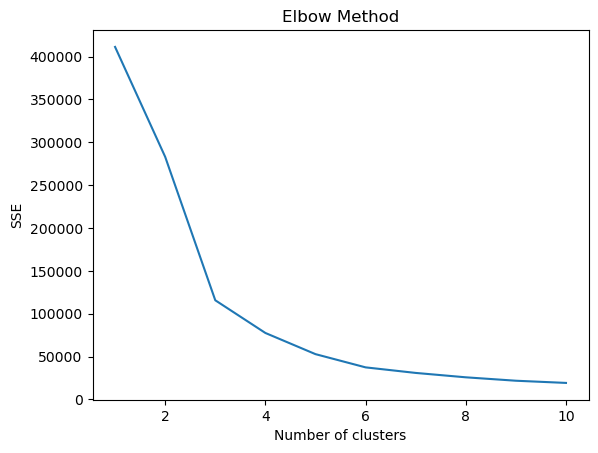

In [47]:
# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

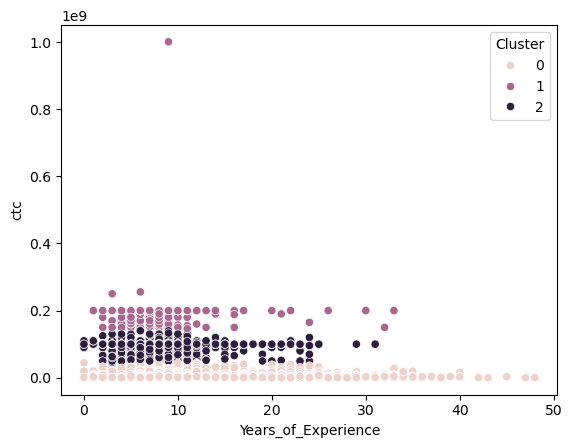

In [48]:
# Applying KMeans
kmeans = KMeans(n_clusters=3)
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters
sns.scatterplot(x='Years_of_Experience', y='ctc', hue='Cluster', data=df_cleaned)
plt.show()

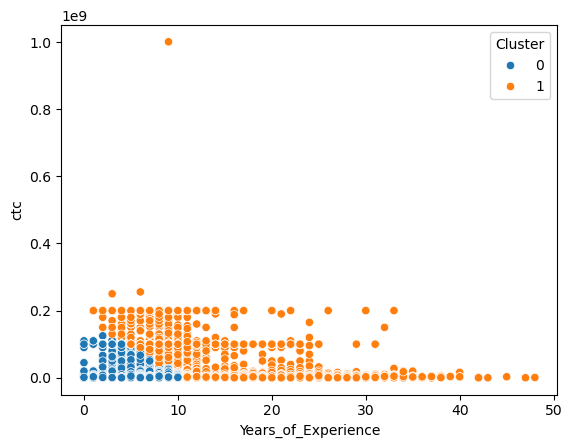

In [49]:
# Applying KMeans
kmeans = KMeans(n_clusters=2)
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters
sns.scatterplot(x='Years_of_Experience', y='ctc', hue='Cluster', data=df_cleaned)
plt.show()

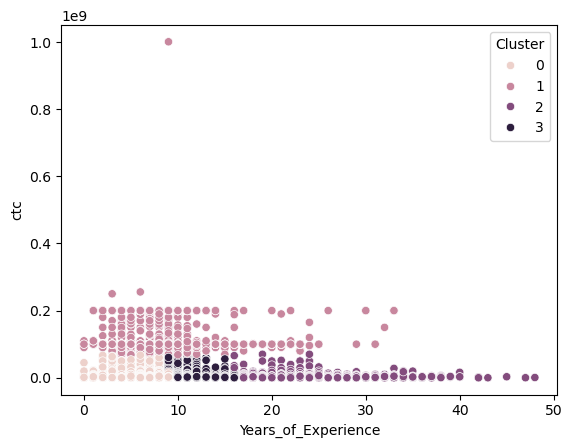

In [50]:
# Applying KMeans
kmeans = KMeans(n_clusters=4)
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters
sns.scatterplot(x='Years_of_Experience', y='ctc', hue='Cluster', data=df_cleaned)
plt.show()

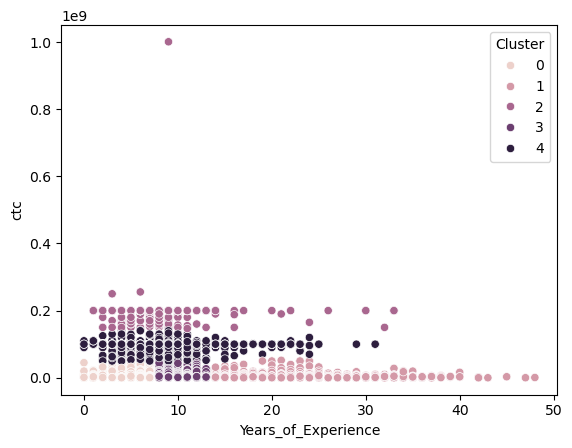

In [51]:
# Applying KMeans
kmeans = KMeans(n_clusters=5)
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters
sns.scatterplot(x='Years_of_Experience', y='ctc', hue='Cluster', data=df_cleaned)
plt.show()

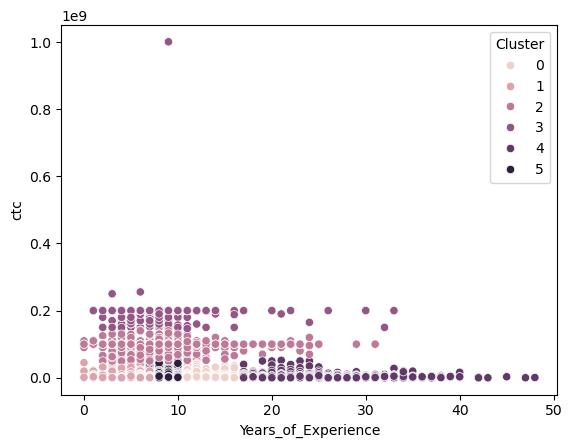

In [52]:
# Applying KMeans
kmeans = KMeans(n_clusters=6)
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters
sns.scatterplot(x='Years_of_Experience', y='ctc', hue='Cluster', data=df_cleaned)
plt.show()

In [53]:
# Check the summary statistics of orgyear
print(df_cleaned['orgyear'].describe())

count    205665.000000
mean       2015.117584
std           4.228364
min        1976.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2024.000000
Name: orgyear, dtype: float64


In [54]:
# Check for any unusual values (e.g., future years or very old years)
print(df_cleaned['orgyear'].value_counts().sort_index())

orgyear
1976        1
1977        1
1979        1
1981        1
1982        4
1984        3
1985        5
1986        8
1987        6
1988       10
1989       22
1990       38
1991       79
1992       47
1993       74
1994       65
1995       94
1996      134
1997      234
1998      279
1999      340
2000      495
2001      713
2002      685
2003     1018
2004     1455
2005     1873
2006     2075
2007     2257
2008     2728
2009     3777
2010     5751
2011     7970
2012    10493
2013    12351
2014    16696
2015    20610
2016    23043
2017    23239
2018    25256
2019    23427
2020    13431
2021     3670
2022      911
2023      252
2024       43
Name: count, dtype: int64


In [55]:
# Check the summary statistics of orgyear
print(df_cleaned['Years_of_Experience'].describe())

count    205665.000000
mean          8.882416
std           4.228364
min           0.000000
25%           6.000000
50%           8.000000
75%          11.000000
max          48.000000
Name: Years_of_Experience, dtype: float64


In [56]:
# Check for any unusual values (e.g., future years or very old years)
print(df_cleaned['Years_of_Experience'].value_counts().sort_index())

Years_of_Experience
0        43
1       252
2       911
3      3670
4     13431
5     23427
6     25256
7     23239
8     23043
9     20610
10    16696
11    12351
12    10493
13     7970
14     5751
15     3777
16     2728
17     2257
18     2075
19     1873
20     1455
21     1018
22      685
23      713
24      495
25      340
26      279
27      234
28      134
29       94
30       65
31       74
32       47
33       79
34       38
35       22
36       10
37        6
38        8
39        5
40        3
42        4
43        1
45        1
47        1
48        1
Name: count, dtype: int64


In [ ]:
# # Perform hierarchical clustering
# Z = linkage(df_scaled, 'ward')
# dendrogram(Z)
# plt.show()

# Try adding  other features


In [89]:
# One-Hot Encode the categorical features
df_encoded = pd.get_dummies(df_cleaned, columns=['job_position', 'company_hash_cleaned'])

In [90]:
df_encoded.shape

(205665, 38278)

In [91]:
df_encoded.head()


,index,email_hash,orgyear,ctc,ctc_updated_year,Years_of_Experience,mean,median,max,min,...,company_hash_cleaned_zxzvnxgzvr xzonqhbtzno,company_hash_cleaned_zxzvzxjv sqghu,company_hash_cleaned_zyco xzaxv,company_hash_cleaned_zyuw rxbxnta,company_hash_cleaned_zyvzwt fgga qtztfvr eqvzwyxogq yi,company_hash_cleaned_zyvzwt wgzohrnxzs tzsxzttqo,company_hash_cleaned_zz,company_hash_cleaned_zzb ztdnstz vacxogqj ucn rna,company_hash_cleaned_zzgato,company_hash_cleaned_zzzbzb
0,0,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,2020,8,1.100000e+06,1100000.0,1100000,1100000,...,False,False,False,False,False,False,False,False,False,False
1,1,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,2019,6,7.742856e+05,750000.0,1200000,449999,...,False,False,False,False,False,False,False,False,False,False
2,2,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,2020,9,2.000000e+06,2000000.0,2000000,2000000,...,False,False,False,False,False,False,False,False,False,False
3,3,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,2019,7,1.436154e+06,1210000.0,3160000,700000,...,False,False,False,False,False,False,False,False,False,False
4,4,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,2019,7,1.400000e+06,1400000.0,1400000,1400000,...,False,False,False,False,False,False,False,False,False,False


In [94]:
# Dropping specified columns from the df_encoded dataframe
df_encoded = df_encoded.drop(columns=['email_hash', 'mean', 'median', 'max', 'min', 'count'])

In [95]:
df_encoded.head()

,index,orgyear,ctc,ctc_updated_year,Years_of_Experience,Designation,Class,Tier,Cluster,job_position_ SDE 2,...,company_hash_cleaned_zxzvnxgzvr xzonqhbtzno,company_hash_cleaned_zxzvzxjv sqghu,company_hash_cleaned_zyco xzaxv,company_hash_cleaned_zyuw rxbxnta,company_hash_cleaned_zyvzwt fgga qtztfvr eqvzwyxogq yi,company_hash_cleaned_zyvzwt wgzohrnxzs tzsxzttqo,company_hash_cleaned_zz,company_hash_cleaned_zzb ztdnstz vacxogqj ucn rna,company_hash_cleaned_zzgato,company_hash_cleaned_zzzbzb
0,0,2016,1100000,2020,8,0,2,2,5,False,...,False,False,False,False,False,False,False,False,False,False
1,1,2018,449999,2019,6,0,3,3,1,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2015,2000000,2020,9,0,1,1,5,False,...,False,False,False,False,False,False,False,False,False,False
3,3,2017,700000,2019,7,0,2,2,1,False,...,False,False,False,False,False,False,False,False,False,False
4,4,2017,1400000,2019,7,0,2,2,1,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Dimensionality Reduction with PCA before t-SNE

In [96]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply PCA to reduce the dimensionality of the data to, say, 50 components
pca = PCA(n_components=50)
df_pca = pca.fit_transform(df_encoded)

MemoryError: Unable to allocate 57.1 GiB for an array with shape (37246, 205665) and data type float64

In [97]:
# do incremental pca

In [98]:
from sklearn.decomposition import IncrementalPCA

# Use Incremental PCA with a batch size
batch_size = 1000  # You can adjust this batch size based on your memory constraints
ipca = IncrementalPCA(n_components=50, batch_size=batch_size)

# Fit Incremental PCA on the large dataset
df_pca = ipca.fit_transform(df_encoded)

# Check the result
df_pca.shape

MemoryError: Unable to allocate 57.1 GiB for an array with shape (37246, 205665) and data type float64

In [ ]:
# type(df1)

In [ ]:
df1.shape

In [ ]:
# # Downsample using Pandas' sample() method if df is a DataFrame
# df1_sample = df1.sample(frac=0.01, random_state=42)  # 10% sample

In [ ]:
df1_sample.head()

In [ ]:
df1_sample.shape

In [ ]:
# # Standardize the numeric columns for clustering
# scaler = StandardScaler()
# df1_sample_scaled = scaler.fit_transform(df1_sample[['ctc', 'Years_of_Experience']])

In [ ]:
# Re-run hierarchical clustering on the downsampled data

In [ ]:
# # Perform hierarchical clustering on a sample
# Z = linkage(df1_sample_scaled, 'ward')
# dendrogram(Z)
# plt.show()